# iLykei Lecture Series
# Text Analytics       
# Word Embeddings


## Yuri Balasanov, &copy; iLykei 2019-2023

This notebook is based on Chapter 8 of Keras Deep Learning Cookbook, Rajeep Dua and Manpreet Singh Ghotra, 2018 Packt Publishing    
It also uses the text:   
Deep Learning for Natural Language Processing, © 2019 Jason Brownlee.   
See also the [blog by Jason Brownlee](https://machinelearningmastery.com/about/)

# Introduction to word embeddings   

Word embeddings are a type of word representations that allows words with similar meaning to have a similar representation. They form a distributed representation for text on the space of numeric vectors that is perhaps one of the key breakthroughs for performance of deep learning methods in recent years.    

One of the benefits of using dense and low-dimensional vectors is computational: the majority of neural network toolkits do not play well with very high-dimensional, sparse vectors. On the other side, the main benefit of the dense representations is generalization
power: if there is a reason to believe that some features may provide similar clues, it is worthwhile to provide a representation, however multidimensional, that is able to capture these similarities.

Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning.

Even though, embeddings often result in very high dimensions of representation vectors these dimensions are still lower than, possibly, thousands or millions of dimensions required for sparse word representations, such as a one hot encoding.   

The distributed representation is learned based on the usage of words. This allows words that are used in similar ways to result in having similar representations, naturally capturing their meaning. **This is different from representation in a bag-of-words models where words are tagged based on frequencies or similar measures, rather than similarities in words meaning based on the context**.   

There is deeper linguistic theory behind the approach, namely the distributional hypothesis by Zellig Harris that could be summarized as:    
"**words that have similar context will have similar meanings**".   

Word embedding methods learn a real-valued vector representation for a predefined fixed sized vocabulary from a corpus of text. The learning process is either supervised, based on classification, or is an unsupervised process, using document statistics.   

# Word2Vec

Word2Vec is one algorithm for learning a word embedding from a text corpus.    
It was developed by Tomas Mikolov, et al. at Google in 2013 as a response to make the neural-network-based training of the embedding more efficient and since then has become the de facto standard for developing pre-trained word embedding.   

Word2Vec models require a lot of text, e.g. the entire Wikipedia corpus. Nevertheless, demonstrate the principles using a small in-memory example of text.   

Two approaches to learning used in Word2Vec are:     

- Continuous Bag-of-Words, or CBOW model, which learns the embedding by predicting the current word based on its context   
- Continuous Skip-Gram Model, which learns by predicting the surrounding words given a current word.

## Gensim   

Library Gensim provides the Word2Vec class for working with a Word2Vec models. Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new Word2Vec() instance.   

Specifically, each sentence must be tokenized, i.e. divided into words and prepared (e.g.  pre-filtered and converted to a preferred case).    
The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora. There are many parameters on this constructor; a few most important of them are:    
- `size`: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word)   
- `window`: (default 5) The maximum distance between a target word and words around the target word    
- `min_count`: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored    
- `workers`: (default 3) The number of threads to use while training   
- `sg`: (default 0) The method of learning, which is either CBOW (0) or Continuous Skip Gram (1).   

The defaults are often good enough when just getting started. If several cores are available it is recommended to increase number of workers to match the number of cores. 

After the model is trained, it is accessible via the `wv` attribute.    
For example, print the learned vocabulary of tokens (words) as follows:   

`words = list(model.wv.vocab)`    
`print(words)`    

The model can be reviewed using:
`print(model['word'])`    

Finally, a trained model can then be saved to file by calling the function `save_word2vec_format()` on the word vector model. By default, the model is saved in a binary format to save space. For example:   
`model.wv.save_word2vec_format('model.bin')`    

Beginners can save the learned model in ASCII format and review the contents. This can be done by setting `binary=False` when calling the `save_word2vec_format()` function, for example:      
`model.wv.save_word2vec_format( ' model.txt ' , binary=False)`   

The saved model can then be loaded again by calling the `Word2Vec.load()` function. For example:       
`model = Word2Vec.load( ' model.bin ' )`    

Here is a worked example. Rather than loading a large text document or corpus from file, create a small, in-memory list of pre-tokenized sentences from Romeo's monologue.     
The model is trained with the minimum count for words set to 1, so that no words are ignored.     

After the model is learned, summarize, print the vocabulary, then print a single vector for the word “love”.    
Finally, the model is saved to a file in binary format, loaded,
and then summarized.

In [1]:
from gensim.models import Word2Vec
sentences = [['love', 'is', 'a', 'smoke', 'raised', 'with', 'the', 'fume', 'of', 'sighs'],
             ['being', 'purged', 'a', 'fire', 'sparkling', 'in', 'lovers', 'eyes'],
             ['being', 'vexed', 'a', 'sea', 'nourished', 'with', 'lovers', 'tears'],
             ['what', 'is', 'it', 'else', '?', 'a', 'madness', 'most', 'discreet'],
             ['a', 'choking', 'gall', 'and', 'a', 'preserving', 'sweet']]

Gensim `Word2Vec` model can be trained on the given corpus of documents. As a result vectors of the given length will be created for each word in the corpus.    
The method has syntax:   
`Word2Vec(sent, window=5, min_count=5, size= 100, workers=3, sg = 0)`

In [2]:
# train model
model = Word2Vec(sentences, min_count=1)

In [3]:
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)

Word2Vec<vocab=33, vector_size=100, alpha=0.025>
['a', 'lovers', 'is', 'with', 'being', 'sweet', 'smoke', 'raised', 'the', 'fume', 'of', 'sighs', 'purged', 'fire', 'sparkling', 'in', 'eyes', 'preserving', 'vexed', 'sea', 'nourished', 'tears', 'what', 'it', 'else', '?', 'madness', 'most', 'discreet', 'choking', 'gall', 'and', 'love']


Parameter `alpha` is the learning rate.   
Check the dimension of the vector for one of the words.

In [4]:
# access vector for one word
print('Vector for token "love": \nShape:',
      model.wv['love'].shape,
      "\nVector:\n",
     model.wv['love'])

# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Vector for token "love": 
Shape: (100,) 
Vector:
 [ 6.4158854e-03 -8.9518158e-03 -7.3439488e-03 -1.7504806e-03
  1.6984275e-03 -1.0345354e-03 -5.2026184e-03  6.5809321e-03
  8.7819025e-03 -7.4124685e-03  9.8058553e-03  7.3639862e-03
 -7.4612605e-03 -1.8980185e-03  4.2513441e-03  7.0611471e-03
 -3.6642421e-03 -6.9740829e-03  4.7241068e-03 -9.0405112e-03
 -5.8483244e-03 -1.2816929e-03  5.4834695e-03 -5.6874342e-03
  4.7849976e-03 -4.3369120e-04  2.6673891e-03  6.4025028e-03
  1.4178640e-03  7.7068470e-03 -3.2075596e-04 -8.2649831e-03
  9.1791386e-03 -4.8598563e-03  4.7215577e-03 -3.9028609e-03
 -7.3274672e-03 -6.5131541e-03  4.6759099e-03 -6.6220079e-04
  1.4589089e-03 -8.9277672e-03 -5.1470171e-03 -6.0554314e-03
  8.4137525e-03 -8.6962022e-03  5.0229500e-03 -8.6090731e-04
  1.8985354e-04  8.8011874e-03 -3.5875789e-03 -6.9385916e-03
  7.6354988e-04  7.7432278e-03  9.1222581e-03 -3.6853473e-03
  2.7329260e-03  4.9417261e-03 -5.2917502e-03  6.8528838e-03
 -6.4535281e-03  2.1000148e-03  4.5

In [5]:
%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib import pyplot

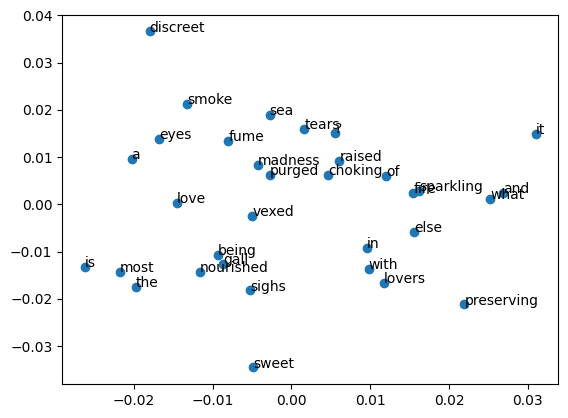

In [6]:
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]

pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Pre-trained embeddings

Training special word vectors may be the best approach for a given NLP problem. But it can take a lot of computing resources, and perhaps some expertise.     

An alternative is to simply use an existing pre-trained word embedding. Along with the paper and code for Word2Vec, Google also published a pre-trained Word2Vec model on the Word2Vec Google Code Project.    

A pre-trained model is a file containing tokens and their associated word vectors. The pre-trained Google Word2Vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors. It is a 1.53 Gigabyte file. You can download it from here:    
[GoogleNews-vectors-negative300.bin.gz](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing).        
Unzipped, the binary file (GoogleNews-vectors-negative300.bin) is 3.4 Gigabytes.     
The Gensim library provides tools to load this file by calling the `KeyedVectors.load_word2vec_format()` function to load this model into memory.    

Another option is GloVe.  
The Global Vectors for Word Representation, or GloVe, algorithm is an extension to the Word2Vec method for efficiently learning word vectors, developed by Pennington, et al. at Stanford.    
Classical vector space model representations of words were developed using matrix factorization techniques such as Latent Semantic Analysis (LSA) that do a good job of using global text statistics but are not as good as the learned methods like Word2Vec at capturing meaning and demonstrating it on tasks like calculating analogies.    

`from gensim.scripts.glove2word2vec import glove2word2vec`    

Convert glove to `word2vec` format:   

`glove_input_file = 'glove.6B.100d.txt'`       
`word2vec_output_file = 'glove.6B.100d.txt.word2vec'`       
`glove2word2vec(glove_input_file, word2vec_output_file)`        

Load the converted model:    

`filename = 'glove.6B.100d.txt.word2vec'`    
`model = KeyedVectors.load_word2vec_format(filename, binary=False)`       

Calculate: `(king - man) + woman = ?`     

`result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)`    
`print(result)`    

The third option is FastText.    
Below use the pretrained FastText model with [embedding dimension 300](https://fasttext.cc/docs/en/english-vectors.html). 

In [7]:
from pathlib import Path
import os
emb_path=Path(os.getcwd()).parent.parent/"Embeddings"

In [8]:
print(emb_path)

/home/yuri/Documents/NLP/Embeddings


In [9]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(emb_path/'crawl-300d-2M.vec')

# calculate: (king - man) + woman = ?
result_1 = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result_1)

[('queen', 0.738545835018158)]


Check the embedding space dimension.

In [10]:
model["king"].shape

(300,)

Here is another nice example:

In [11]:
result_2 = model.most_similar(positive=['entrepreneur','mother'], negative=['father'], topn=5)
print(result_2)

[('entrepeneur', 0.697232723236084), ('entreprenuer', 0.6770118474960327), ('mompreneur', 0.6741642355918884), ('businesswoman', 0.6718159914016724), ('momtrepreneur', 0.6638749241828918)]


Any NLP model trained on large amount of text, like Wikipedia, may reflect any stereotypes and biases of the current society contained in the tran data.  
Here is one example: "doctor" + "mother" - "father" results in the first choice "nurse" with confidence almost 70%.

In [12]:
result_3 = model.most_similar(positive=['doctor','mother'], negative=['father'], topn=5)
print(result_3)

[('nurse', 0.6805988550186157), ('doctors', 0.6673180460929871), ('physician', 0.6519721746444702), ('gynecologist', 0.6482012271881104), ('docotor', 0.6292949914932251)]


Compare this with the score of clearly independent concepts.

In [13]:
result_1 = model.most_similar(positive=['read'], negative=['swim'], topn=5)
print(result_1)

[('reading', 0.45657142996788025), ('re-read', 0.4526975452899933), ('reread', 0.4334571957588196), ('written', 0.4051706790924072), ('read.That', 0.3973703384399414)]


# Embedding layer in Keras

In [14]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Embedding

2023-08-06 21:22:57.598697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 21:22:57.704602: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-06 21:22:57.707467: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-06 21:22:57.707480: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

Instead of using pre-trained embeddings like **Word2Vec** or **GloVe**, a slower, but more tailored to a particular text approach is provided by the embedding layer in Keras.    

## Example   

Create a set of documents with labels showing sentiment.

In [15]:
# define documents
documents = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

Embedding layer requires words represented by integers. Use function `one_hot()` to tokenize documents. This function, actually, instead of one-hot encoding does `hashing_trick()` which converts text into a sequence of fixed-sized integers or hashing space. 

In [16]:
vocab_size = 50
encodeDocuments = [one_hot(doc, vocab_size) for doc in documents]
print(encodeDocuments)

[[31, 19], [36, 7], [43, 27], [24, 7], [21], [45], [33, 27], [21, 36], [33, 7], [49, 13, 19, 37]]


Pad the texts to give them equal lengths.

In [17]:
max_length = 4
paddedDocuments = pad_sequences(encodeDocuments, maxlen=max_length, padding='post')
print(paddedDocuments)

[[31 19  0  0]
 [36  7  0  0]
 [43 27  0  0]
 [24  7  0  0]
 [21  0  0  0]
 [45  0  0  0]
 [33 27  0  0]
 [21 36  0  0]
 [33  7  0  0]
 [49 13 19 37]]


Create a model with `Embedding` as the first layer of the model.

This layer can be trainable and learn word embeddings as part of model, or it can contain pre-trained embeddings.

Arguments of the layer are:

- `input_dim`: size of the vocabulary
- `output_dim`: dimension of the vector space in which words are embedded
- `input_length`: length of input sequences.

The output from the layer is 4 8-dimensional vectors, one per word in the document.

The model is a binary classifier predicting the sentiment.     

## Trainable embeddings   

Create a model with trainable embeddings.

In [18]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


2023-08-06 21:22:59.032844: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-06 21:22:59.032864: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-06 21:22:59.032885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yuri-XPS-9320): /proc/driver/nvidia/version does not exist
2023-08-06 21:22:59.033086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.fit(paddedDocuments, labels, epochs=50, verbose=0)

Evaluate the model on training set: it is too small to split it into train and test.

In [20]:
loss, accuracy = model.evaluate(paddedDocuments, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


## Using pre-trained embeddings    

Replace the embedding layer with non-trainable layer containing fixed embeddings from GloVe. 

In [21]:
from numpy import asarray, zeros
from tensorflow.keras.preprocessing.text import Tokenizer

Within Keras there is a more sophisticated API provided by the class `Tokenizer`. This class prepares larger NLP projects for deep learning modeling.    
The fitted `Tokenizer` returns 4 attributes:

- word_count: A dictionary mapping of words and their occurrence counts when the Tokenizer was fit
- word_docs: A dictionary mapping of words and the number of documents that reach appears in
- word_index: A dictionary of words and their uniquely assigned integers
- document_count: A dictionary mapping and the number of documents they appear in calculated during the fit.   

After fitting `Tokenizer` to training data, it can be used to encode documents in both
train and test datasets.    
The function `texts_to_matrix()` can be used to create one vector per document. The length of the vectors is the total size of the vocabulary.    
This function is common for text encoding for standard bag-of-words models. It works in several modes.     
The available modes include:    

- binary: Whether or not each word is present in the document. This is the default
- count: The count of each word in the document
- tfidf: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document
- freq: The frequency of each word as a ratio of words within each document

`Tokenizer` can be used to convert texts into numbers.

In [22]:
# use tokenizer and pad
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
vocab_size = len(tokenizer.word_index) + 1
encodeDocuments = tokenizer.texts_to_sequences(documents)
print(encodeDocuments)


[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


To make all sentences with the same length pad them. 

In [23]:
max_length = 4
paddedDocuments = pad_sequences(encodeDocuments, maxlen=max_length, padding='post')
print(paddedDocuments)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


Download from [**Global Vectors for Words Representation**](https://nlp.stanford.edu/projects/glove/) the smallest file `glove.6B.zip` and extract file with vectors of dimension 100 from the archive: `glove.6B.100d.txt`. 

In [24]:
# load glove model
inMemoryGlove = dict()
f = open(emb_path/'glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefficients = asarray(values[1:], dtype='float32')
    inMemoryGlove[word] = coefficients
f.close()
print(len(inMemoryGlove))

400000


In [25]:
print('First element: ',list(inMemoryGlove.keys())[0])
print('Vector for "the": \n',list(inMemoryGlove.values())[0])

First element:  the
Vector for "the": 
 [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058 

Create a matrix of embeddings of all words in the corpus. Then load this matrix as weights of the layer Embedding and make it non-trainable.

In [26]:
# create coefficient matrix for training data
trainingToEmbeddings = zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    gloveVector = inMemoryGlove.get(word)
    if gloveVector is not None:
        trainingToEmbeddings[i] = gloveVector

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[trainingToEmbeddings], 
                    input_length=max_length, trainable=False))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 100)            1500      
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________
None


Fit and validate the model.

In [29]:
model.fit(paddedDocuments, labels, epochs=50, verbose=0)

In [30]:
loss, accuracy = model.evaluate(paddedDocuments, labels, verbose=0)
print('Accuracy: %f' % (accuracy * 100))

Accuracy: 100.000000
